In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
from time import time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import zipfile
import time
import cv2



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [ ]:
!nvidia-smi

Thu Aug 19 02:59:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |    345MiB / 16280MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
path_to_zip_file = "/content/drive/MyDrive/custom_train.zip"
directory_to_extract_to = "content/drive/MyDrive/custom"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
path_to_zip_file = "/content/drive/MyDrive/custom_test.zip"
directory_to_extract_to = "content/drive/MyDrive/custom_test"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
!pwd

/content


In [ ]:
px = 410

In [ ]:
rootdir = './custom_train/rank'
generator = ImageDataGenerator(rescale=1./255)
image_generator = generator.flow_from_directory(rootdir, target_size=(500,400), batch_size=659, class_mode='sparse')

FileNotFoundError: ignored

In [ ]:
images, labels = image_generator.next()


In [ ]:
images.shape

(539, 500, 400, 3)

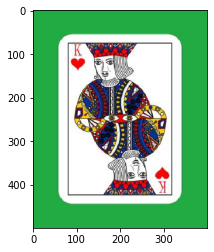

In [ ]:
plt.imshow(images[ 6])

In [ ]:
labels[6]

11.0

In [ ]:
X_train = images
y_train = labels

In [ ]:
y_train.shape

(539,)

In [ ]:
LR = 0.01
BS = 400 #20
EPOCHS = 1000


EarlyStop = EarlyStopping(monitor='val_loss',patience=10)
SaveBestRank = ModelCheckpoint('TheGamblerRank.h5',save_best_only=True, verbose = 2)


In [ ]:
#More filters for each layers

model = Sequential()

model.add(Conv2D(3,(3,3),activation = 'relu', input_shape=(500,400,3)))
model.add(Conv2D(3,(3,3),activation = 'relu'))
model.add(Conv2D(3,(3,3),activation = 'relu'))

model.add(Conv2D(8,(3,3),activation = 'relu'))
model.add(Conv2D(8,(3,3),activation = 'relu'))
model.add(Conv2D(8,(3,3),activation = 'relu'))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))

model.add(Conv2D(512,(3,3),activation = 'relu'))
model.add(Conv2D(512,(3,3),activation = 'relu'))
model.add(Conv2D(512,(3,3),activation = 'relu'))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu')) #Maybe 4096 through and through
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(13,activation='softmax'))




In [ ]:
model.compile(optimizer=Adam(learning_rate=LR),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start = time.time()

hist = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2,
                 callbacks=[SaveBestRank]
                )
end = time.time()
print(end - start)

Epoch 1/1000
14/14 [==============================] - 6s 342ms/step - loss: 337038048.0000 - accuracy: 0.0858 - val_loss: 28229324.0000 - val_accuracy: 0.1019

Epoch 00001: val_loss improved from inf to 28229324.00000, saving model to TheGamblerRank.h5
Epoch 2/1000
14/14 [==============================] - 5s 324ms/step - loss: 3715375.0000 - accuracy: 0.0557 - val_loss: 119214.9844 - val_accuracy: 0.1019

Epoch 00002: val_loss improved from 28229324.00000 to 119214.98438, saving model to TheGamblerRank.h5
Epoch 3/1000
14/14 [==============================] - 5s 326ms/step - loss: 1250440.3750 - accuracy: 0.0766 - val_loss: 1812.7399 - val_accuracy: 0.0556

Epoch 00003: val_loss improved from 119214.98438 to 1812.73987, saving model to TheGamblerRank.h5
Epoch 4/1000
14/14 [==============================] - 5s 323ms/step - loss: 5323.7759 - accuracy: 0.0789 - val_loss: 4.8822 - val_accuracy: 0.0370

Epoch 00004: val_loss improved from 1812.73987 to 4.88223, saving model to TheGamblerRank

In [ ]:
model

In [ ]:
rootdir = './custom_train/suit'
generator = ImageDataGenerator(rescale=1./255)
image_generator = generator.flow_from_directory(rootdir, target_size=(500,400), batch_size=1000, class_mode='sparse')

Found 539 images belonging to 4 classes.


In [ ]:
generator = ImageDataGenerator(rescale=1./255)
image_generator = generator.flow_from_directory(rootdir, target_size=(500,400), batch_size=1000, class_mode='sparse')
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)
train_generator = train_datagen.flow_from_directory(
        'custom_train/suit',  # this is the target directory
        target_size=(500,400),  # all images will be resized
        batch_size=1000,
        class_mode='categorical')

# validation_generator = test_datagen.flow_from_directory(
#         validation_data_dir,
#         target_size=(img_height, img_width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 539 images belonging to 4 classes.


In [ ]:
images, labels = image_generator.next()
sX_train = images
sy_train = labels

In [ ]:

images.shape

(539, 500, 400, 3)

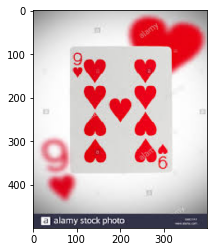

In [ ]:
plt.imshow(sX_train[ 6])

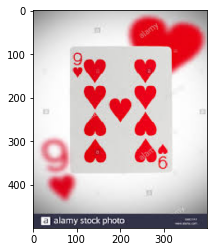

In [ ]:
plt.imshow(sX_train[6])

In [ ]:
sy_train[6]

3.0

In [ ]:
LR = 0.001
BS = 360 #20
EPOCHS = 3000
EarlyStop = EarlyStopping(monitor='val_loss',patience=10)
SaveBestSuit = ModelCheckpoint('TheGamblerSuit.h5',save_best_only=True, verbose = 2)

In [ ]:
#More filters for each layers

smodel = Sequential()

smodel.add(Conv2D(3,(3,3),activation = 'relu', input_shape=(500,400,3)))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))


smodel.add(Conv2D(8,(3,3),activation = 'relu'))
smodel.add(Conv2D(8,(3,3),activation = 'relu'))
smodel.add(Conv2D(8,(3,3),activation = 'relu'))
smodel.add(Conv2D(16,(3,3),activation = 'relu'))
smodel.add(Conv2D(16,(3,3),activation = 'relu'))
smodel.add(Conv2D(16,(3,3),activation = 'relu'))
smodel.add(MaxPooling2D((2,2)))
smodel.add(Conv2D(32,(3,3),activation = 'relu'))
smodel.add(Conv2D(32,(3,3),activation = 'relu'))
smodel.add(Conv2D(32,(3,3),activation = 'relu'))
smodel.add(MaxPooling2D((2,2)))
smodel.add(Conv2D(64,(3,3),activation = 'relu'))
smodel.add(Conv2D(64,(3,3),activation = 'relu'))
smodel.add(Conv2D(64,(3,3),activation = 'relu'))
smodel.add(MaxPooling2D((2,2)))
smodel.add(Conv2D(128,(3,3),activation = 'relu'))
smodel.add(Conv2D(128,(3,3),activation = 'relu'))
smodel.add(Conv2D(128,(3,3),activation = 'relu'))
smodel.add(MaxPooling2D((2,2)))
smodel.add(Conv2D(256,(3,3),activation = 'relu'))
smodel.add(Conv2D(256,(3,3),activation = 'relu'))
smodel.add(Conv2D(256,(3,3),activation = 'relu'))

smodel.add(Conv2D(512,(3,3),activation = 'relu'))
smodel.add(Conv2D(512,(3,3),activation = 'relu'))
smodel.add(Conv2D(512,(3,3),activation = 'relu'))
smodel.add(Conv2D(512,(3,3),activation = 'relu'))

smodel.add(Flatten())
smodel.add(Dense(4096,activation='relu'))
smodel.add(Dense(4096,activation='relu')) #Maybe 4096 through and through
smodel.add(Dense(4096,activation='relu'))
smodel.add(Dense(4,activation='softmax'))




In [ ]:
smodel.compile(optimizer=Adam(learning_rate=LR),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
smodel.fit_generator(
        train_generator,
        steps_per_epoch=600 // 1000,
        epochs=150, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150


ValueError: ignored

In [ ]:
start = time.time()

hist = smodel.fit(sX_train, sy_train, epochs=EPOCHS, validation_split=0.2,
                 callbacks=[SaveBestSuit]
                )
end = time.time()
print(end - start)

Streaming output truncated to the last 5000 lines.
14/14 [==============================] - 5s 358ms/step - loss: 1.3834 - accuracy: 0.2715 - val_loss: 1.4053 - val_accuracy: 0.2130

Epoch 01751: val_loss did not improve from 1.39439
Epoch 1752/3000
14/14 [==============================] - 5s 355ms/step - loss: 1.3834 - accuracy: 0.2715 - val_loss: 1.4052 - val_accuracy: 0.2130

Epoch 01752: val_loss did not improve from 1.39439
Epoch 1753/3000
14/14 [==============================] - 5s 357ms/step - loss: 1.3835 - accuracy: 0.2715 - val_loss: 1.4053 - val_accuracy: 0.2130

Epoch 01753: val_loss did not improve from 1.39439
Epoch 1754/3000
14/14 [==============================] - 5s 358ms/step - loss: 1.3835 - accuracy: 0.2715 - val_loss: 1.4048 - val_accuracy: 0.2130

Epoch 01754: val_loss did not improve from 1.39439
Epoch 1755/3000
14/14 [==============================] - 5s 357ms/step - loss: 1.3835 - accuracy: 0.2715 - val_loss: 1.4045 - val_accuracy: 0.2130

Epoch 01755: val_loss

In [ ]:
import tensorflow as tf


In [ ]:
LR = 0.001
BS = 360 #20
EPOCHS = 100
EarlyStop = EarlyStopping(monitor='val_loss',patience=10)
SaveBestSuit = ModelCheckpoint('TheGamblerTransferSuit.h5',save_best_only=True, verbose = 2)

In [ ]:
stmodel = Sequential()

stmodel.add(tf.keras.applications.resnet50.ResNet50(input_shape = (500, 400,3), 
                                include_top = False, 
                                weights = 'imagenet'))
stmodel.add(Dense(4096,activation='relu'))
stmodel.add(Dense(4,activation='softmax'))

In [ ]:
stmodel.compile(optimizer=Adam(learning_rate=LR),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start = time.time()

hist = stmodel.fit(sX_train, sy_train, epochs=EPOCHS, validation_split=0.2)
end = time.time()
print(end - start)

Epoch 1/100


InvalidArgumentError: ignored

In [ ]:
model = Sequential()

model.add(tf.keras.applications.resnet50.ResNet50(input_shape = (500,400,3), 
                                include_top = False, 
                                weights = 'imagenet'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(sX_train, sy_train, epochs=EPOCHS, validation_split=0.2)


Epoch 1/100


ValueError: ignored

In [ ]:
#Transfer

In [ ]:
#Commence Augmentaion


In [ ]:
LR = 0.001
BS = 25
EPOCHS = 150
EarlyStop = EarlyStopping(monitor='val_loss',patience=10)
SaveBestSuit = ModelCheckpoint('TheGamblerSuit.h5',save_best_only=True, verbose = 2)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=90, width_shift_range=0.1,height_shift_range=0.1,shear_range=0.15, zoom_range=0.1)

In [ ]:
rootdir = './custom_train/suit'

train_generator = train_datagen.flow_from_directory(rootdir, target_size=(500,400), batch_size=BS, class_mode='sparse')

Found 539 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
smodel = Sequential()

smodel.add(Conv2D(3,(3,3),activation = 'relu', input_shape=(500,400,3)))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))
smodel.add(Conv2D(3,(3,3),activation = 'relu'))


smodel.add(Conv2D(8,(3,3),activation = 'relu'))
smodel.add(Conv2D(8,(3,3),activation = 'relu'))
smodel.add(Conv2D(8,(3,3),activation = 'relu'))
smodel.add(Conv2D(16,(3,3),activation = 'relu'))
smodel.add(Conv2D(16,(3,3),activation = 'relu'))
smodel.add(Conv2D(16,(3,3),activation = 'relu'))
smodel.add(MaxPooling2D((2,2)))
smodel.add(Conv2D(32,(3,3),activation = 'relu'))
smodel.add(Conv2D(32,(3,3),activation = 'relu'))
smodel.add(Conv2D(32,(3,3),activation = 'relu'))
smodel.add(MaxPooling2D((2,2)))
smodel.add(Conv2D(64,(3,3),activation = 'relu'))
smodel.add(Conv2D(64,(3,3),activation = 'relu'))
smodel.add(Conv2D(64,(3,3),activation = 'relu'))
smodel.add(MaxPooling2D((2,2)))
smodel.add(Conv2D(128,(3,3),activation = 'relu'))
smodel.add(Conv2D(128,(3,3),activation = 'relu'))
smodel.add(Conv2D(128,(3,3),activation = 'relu'))
smodel.add(MaxPooling2D((2,2)))
smodel.add(Conv2D(256,(3,3),activation = 'relu'))
smodel.add(Conv2D(256,(3,3),activation = 'relu'))
smodel.add(Conv2D(256,(3,3),activation = 'relu'))

smodel.add(Conv2D(512,(3,3),activation = 'relu'))
smodel.add(Conv2D(512,(3,3),activation = 'relu'))
smodel.add(Conv2D(512,(3,3),activation = 'relu'))
smodel.add(Conv2D(512,(3,3),activation = 'relu'))

smodel.add(Flatten())
smodel.add(Dense(4096,activation='relu'))
smodel.add(Dense(4096,activation='relu')) #Maybe 4096 through and through
smodel.add(Dense(4096,activation='relu'))
smodel.add(Dense(4,activation='softmax'))


In [ ]:
 smodel.compile(optimizer=Adam(learning_rate=LR),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
hist = smodel.fit(
        x=train_generator,
      #  steps_per_epoch=500 // BS,
        epochs=EPOCHS)

Epoch 1/150
22/22 [==============================] - 33s 1s/step - loss: 1.4545 - accuracy: 0.2597
Epoch 2/150
22/22 [==============================] - 23s 1s/step - loss: 1.3868 - accuracy: 0.2597
Epoch 3/150
22/22 [==============================] - 22s 994ms/step - loss: 1.4353 - accuracy: 0.2393
Epoch 4/150
22/22 [==============================] - 23s 1s/step - loss: 1.3868 - accuracy: 0.2523
Epoch 5/150
22/22 [==============================] - 23s 1s/step - loss: 1.3864 - accuracy: 0.2505
Epoch 6/150
22/22 [==============================] - 22s 997ms/step - loss: 1.3863 - accuracy: 0.2597
Epoch 7/150
22/22 [==============================] - 24s 1s/step - loss: 1.3873 - accuracy: 0.2597
Epoch 8/150
22/22 [==============================] - 22s 1s/step - loss: 1.3864 - accuracy: 0.2597
Epoch 9/150
22/22 [==============================] - 22s 985ms/step - loss: 1.3861 - accuracy: 0.2597
Epoch 10/150
22/22 [==============================] - 24s 1s/step - loss: 1.3862 - accuracy: 0.2597


In [ ]:
smodel.save_weights('first_trySuit.h5')  

In [ ]:
path_to_zip_file = "/content/drive/MyDrive/croppedInputData.zip"
directory_to_extract_to = "content/drive/MyDrive/cropped"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
rootdir = './croppedInputData/suit'
generator = ImageDataGenerator(rescale=1./255)
image_generator = generator.flow_from_directory(rootdir, target_size=(50,40), batch_size=1413, class_mode='sparse')
images, labels = image_generator.next()

Found 1413 images belonging to 4 classes.


In [ ]:
images, labels = image_generator.next()
sX_train = images[:1313]
sy_train = labels[:1313]
sX_test = images[1313:]
sy_test = labels[1313:]

In [ ]:
images.shape

(1413, 50, 40, 3)

In [ ]:
sX_train.shape

(1313, 50, 40, 3)

In [ ]:
sX_test.shape

(100, 50, 40, 3)

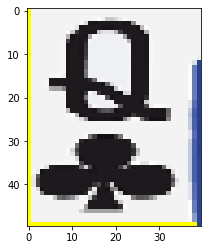

In [ ]:
plt.imshow(images[ 7])

In [ ]:
LR = 0.0001
BS = 1000 #20
EPOCHS = 400
EarlyStop = EarlyStopping(monitor='val_loss',patience=10)
SaveBestSuit = ModelCheckpoint('TheGamblerSuit4.h5',save_best_only=True, verbose = 2)

In [ ]:
#SUCCESSFUL CUSTOM SUIT CNN
model = Sequential()

model.add(Conv2D(3,(3,3), activation = 'relu', input_shape=(50,40,3)))
model.add(Conv2D(8,(3,3), activation = 'relu'))
model.add(Conv2D(8,(3,3), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Conv2D(16,(3,3), activation = 'relu'))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(Dropout(0.1))


model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Dropout(0.1))


model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Conv2D(512,(3,3), activation = 'relu'))
model.add(Conv2D(512,(3,3), activation = 'relu'))
model.add(Conv2D(512,(3,3), activation = 'relu'))
model.add(Dropout(0.1))



model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))



model.add(Dense(4, activation = 'softmax'))



In [ ]:
model.compile(optimizer=Adam(learning_rate=LR),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
start = time.time()

hist = model.fit(sX_train, sy_train, epochs=EPOCHS, validation_split=0.2,
                 callbacks=[SaveBestSuit]
                )
end = time.time()
print(end - start)

Epoch 1/400
33/33 [==============================] - 3s 42ms/step - loss: 1.3863 - accuracy: 0.2352 - val_loss: 1.3862 - val_accuracy: 0.2471

Epoch 00001: val_loss improved from inf to 1.38622, saving model to TheGamblerSuit4.h5
Epoch 2/400
33/33 [==============================] - 1s 35ms/step - loss: 1.3731 - accuracy: 0.2552 - val_loss: 1.3223 - val_accuracy: 0.3536

Epoch 00002: val_loss improved from 1.38622 to 1.32230, saving model to TheGamblerSuit4.h5
Epoch 3/400
33/33 [==============================] - 1s 35ms/step - loss: 1.2938 - accuracy: 0.3600 - val_loss: 1.1528 - val_accuracy: 0.4144

Epoch 00003: val_loss improved from 1.32230 to 1.15275, saving model to TheGamblerSuit4.h5
Epoch 4/400
33/33 [==============================] - 1s 35ms/step - loss: 1.0293 - accuracy: 0.4467 - val_loss: 0.9555 - val_accuracy: 0.4487

Epoch 00004: val_loss improved from 1.15275 to 0.95548, saving model to TheGamblerSuit4.h5
Epoch 5/400
33/33 [==============================] - 1s 35ms/step - 

In [ ]:
rootdir = './custom_test/suit'
generator = ImageDataGenerator(rescale=1./255)
image_generator = generator.flow_from_directory(rootdir, target_size=(250,200), batch_size=659, class_mode='sparse')
images, labels = image_generator.next()


Found 98 images belonging to 4 classes.


In [ ]:
sX_test.shape

(100, 50, 40, 3)

In [ ]:
loadel = load_model("/content/content/TheGamblerSuit4Final.h5")
loadel.evaluate(sX_test, sy_test)

4/4 [==============================] - 0s 9ms/step - loss: 1.1068 - accuracy: 0.9000


[1.1068028211593628, 0.8999999761581421]

In [ ]:
model.evaluate(sX_test,sy_test)


NameError: ignored

In [ ]:
model.predict(sX_test[:1])

array([[1.2589022e-22, 1.0000000e+00, 3.2953641e-22, 2.8687246e-22]],
      dtype=float32)

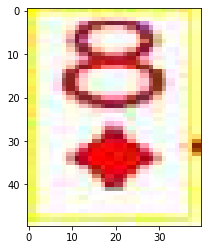

In [ ]:
plt.imshow(sX_test[0])

In [ ]:
sy_test[0]

1.0

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 36ms/step - loss: 1.3929 - accuracy: 0.2449


[1.392898440361023, 0.2448979616165161]

3.0

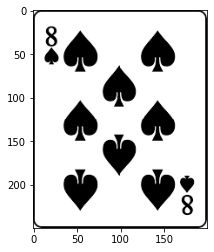

In [ ]:
plt.imshow(X_test[0])


In [ ]:
y_test[0]

3.0

In [ ]:
rootdir = './croppedInputData/rank'
rgenerator = ImageDataGenerator(rescale=1./255)
rimage_generator = rgenerator.flow_from_directory(rootdir, target_size=(50,40), batch_size=1420, class_mode='sparse')
rimages, rlabels = rimage_generator.next()

Found 1420 images belonging to 13 classes.


In [ ]:
rimages, rlabels = rimage_generator.next()
rX_train = rimages[:1320]
ry_train = rlabels[:1320]
rX_test = rimages[1320:]
ry_test = rlabels[1320:]

In [ ]:
rX_train.shape

(1320, 80, 60, 3)

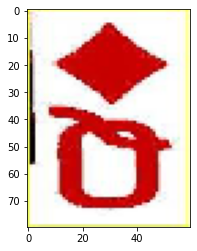

In [ ]:
plt.imshow(rX_train[0])

In [ ]:
LR = 0.0001
BS = 1000 #20
EPOCHS = 600
EarlyStop = EarlyStopping(monitor='val_loss',patience=10)
SaveBestRank = ModelCheckpoint('TheGamblerRank3NewArch2.h5',save_best_only=True, verbose = 2)

In [ ]:
rmodel = Sequential()
rmodel.add(Conv2D(3,(3,3), activation = 'relu', input_shape=(50,40,3)))
rmodel.add(Conv2D(3,(3,3), activation = 'relu'))
rmodel.add(Conv2D(3,(3,3), activation = 'relu'))

rmodel.add(Conv2D(8,(3,3), activation = 'relu'))
rmodel.add(Conv2D(8,(3,3), activation = 'relu'))
rmodel.add(Conv2D(8,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))

#model.add(MaxPooling2D((2,2)))


rmodel.add(Conv2D(16,(3,3), activation = 'relu'))
rmodel.add(Conv2D(16,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))


rmodel.add(Conv2D(32,(3,3), activation = 'relu'))
rmodel.add(Conv2D(32,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))

rmodel.add(Conv2D(64,(3,3), activation = 'relu'))
rmodel.add(Conv2D(64,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))

rmodel.add(Conv2D(128,(3,3), activation = 'relu'))
rmodel.add(Conv2D(128,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.15))

rmodel.add(Conv2D(256,(3,3), activation = 'relu'))
rmodel.add(Conv2D(256,(3,3), activation = 'relu'))
rmodel.add(Conv2D(256,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.15))

rmodel.add(Conv2D(512,(3,3), activation = 'relu'))
#rmodel.add(Conv2D(512,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.2))

rmodel.add(Conv2D(512,(3,3), activation = 'relu'))
#rmodel.add(Conv2D(512,(3,3), activation = 'relu'))
#rmodel.add(Dropout(0.15))


rmodel.add(Flatten())
rmodel.add(Dense(2000,activation='relu'))
rmodel.add(Dropout(0.1))

rmodel.add(Dense(2000,activation='relu'))
rmodel.add(Dense(2000,activation='relu'))
rmodel.add(Dropout(0.1))

rmodel.add(Dense(2000,activation='relu'))

rmodel.add(Dense(13, activation = 'softmax'))


In [ ]:
#SUCCESSFUL RANK CUSTOM CNN
rmodel = Sequential()

rmodel.add(Conv2D(3,(3,3), activation = 'relu', input_shape=(50,40,3)))

rmodel.add(Conv2D(8,(3,3), activation = 'relu'))
rmodel.add(Conv2D(8,(3,3), activation = 'relu'))

rmodel.add(Dropout(0.1))


rmodel.add(Conv2D(16,(3,3), activation = 'relu'))

rmodel.add(Conv2D(32,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))


rmodel.add(Conv2D(64,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))

rmodel.add(Conv2D(128,(3,3), activation = 'relu'))
rmodel.add(Conv2D(128,(3,3), activation = 'relu'))
rmodel.add(Conv2D(128,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))


rmodel.add(Conv2D(256,(3,3), activation = 'relu'))
rmodel.add(Conv2D(256,(3,3), activation = 'relu'))
rmodel.add(Conv2D(256,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))

rmodel.add(Conv2D(512,(3,3), activation = 'relu'))
rmodel.add(Conv2D(512,(3,3), activation = 'relu'))
rmodel.add(Conv2D(512,(3,3), activation = 'relu'))
rmodel.add(Dropout(0.1))



rmodel.add(Flatten())
rmodel.add(Dense(1000,activation='relu'))



rmodel.add(Dense(13, activation = 'softmax'))
#THIS IS IT


In [ ]:


rmodel.compile(optimizer=Adam(learning_rate=LR),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
rX_train.shape

(1320, 50, 40, 3)

In [ ]:
start = time.time()

hist = rmodel.fit(rX_train, ry_train, epochs=EPOCHS, validation_split=0.2,
                 callbacks=[SaveBestRank], batch_size= BS
                )
end = time.time()
print(end - start)

Epoch 1/600
2/2 [==============================] - 30s 8s/step - loss: 2.5653 - accuracy: 0.0720 - val_loss: 2.5639 - val_accuracy: 0.0758

Epoch 00001: val_loss improved from inf to 2.56395, saving model to TheGamblerRank3NewArch2.h5
Epoch 2/600
2/2 [==============================] - 1s 181ms/step - loss: 2.5641 - accuracy: 0.0805 - val_loss: 2.5636 - val_accuracy: 0.0758

Epoch 00002: val_loss improved from 2.56395 to 2.56362, saving model to TheGamblerRank3NewArch2.h5
Epoch 3/600
2/2 [==============================] - 1s 177ms/step - loss: 2.5640 - accuracy: 0.0786 - val_loss: 2.5634 - val_accuracy: 0.0758

Epoch 00003: val_loss improved from 2.56362 to 2.56343, saving model to TheGamblerRank3NewArch2.h5
Epoch 4/600
2/2 [==============================] - 1s 177ms/step - loss: 2.5635 - accuracy: 0.0805 - val_loss: 2.5635 - val_accuracy: 0.0985

Epoch 00004: val_loss did not improve from 2.56343
Epoch 5/600
2/2 [==============================] - 1s 176ms/step - loss: 2.5633 - accuracy

In [ ]:
rmodel.evaluate(rX_test,ry_test)


4/4 [==============================] - 1s 83ms/step - loss: 4.7762 - accuracy: 0.6800


[4.776168346405029, 0.6800000071525574]

In [ ]:
rmodel.save('TheGamblerRankV3TrainComplete.h5')

In [ ]:
rload  = load_model('TheGamblerRank3NewArch2.h5')

In [ ]:
rloadtrain=load_model('TheGamblerRankV3TrainComplete.h5')

In [ ]:
rloadtrain.evaluate(rX_test,ry_test)

4/4 [==============================] - 0s 14ms/step - loss: 4.7762 - accuracy: 0.6800


[4.776168346405029, 0.6800000071525574]

In [ ]:
rload.evaluate(rX_test,ry_test)

4/4 [==============================] - 0s 14ms/step - loss: 1.5706 - accuracy: 0.6400


[1.570633053779602, 0.6399999856948853]

In [ ]:
from google.colab import files
files.download("/content/TheGamblerRankV3TrainComplete.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Finding images for Paper

In [ ]:
#Suit
path_to_zip_file = "/content/drive/MyDrive/custom_testcropped.zip"
directory_to_extract_to = "content/drive/MyDrive/custom_testcropped"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
rootdir = './custom_testcropped/suit'
sgenerator = ImageDataGenerator(rescale=1./255)
simage_generator = sgenerator.flow_from_directory(rootdir, target_size=(50,40), batch_size=97, class_mode='sparse')
simages, slabels = simage_generator.next()

Found 97 images belonging to 4 classes.


In [ ]:

sX_test = simages
sy_test = slabels

In [ ]:
sload  = load_model('TheGamblerSuit4Final.h5')

In [ ]:
np.argmax(sload.predict(sX_test[0:1]))


1

In [ ]:
sy_test[0]

2.0

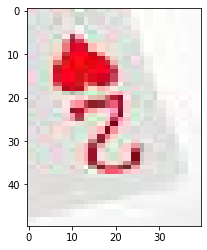

In [ ]:
plt.imshow(sX_test[0])

In [ ]:
np.argmax(sload.predict(sX_test[1:2]))


1

In [ ]:
sy_test[1]

2.0

In [ ]:
np.argmax(sload.predict(sX_test[2:3]))

2

In [ ]:
sy_test[2]

2.0

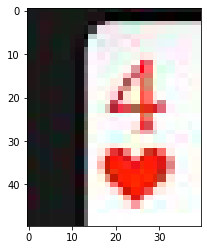

In [ ]:
plt.imshow(sX_test[2])

In [ ]:
np.argmax(sload.predict(sX_test[4:5]))

1

In [ ]:
sy_test[4]

1.0

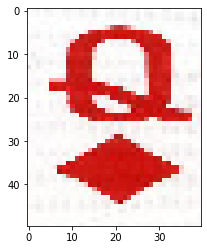

In [ ]:
plt.imshow(sX_test[4])

In [ ]:
for i in range(10000):
  print("Waiting on will please don't idle")
  time.sleep(360)

Waiting on will please don't idle
Waiting on will please don't idle
